threshold model

For the purpose of illustration here, we will assume that there are 250 students of each type in a high school. Each agent represents a student. These agents all live on a single unit square (this can be visualized as a high school building). The position of an agent is just a point (x, y), where 0 < x ,y <1. An agent is happy if half or more of her 12 nearest neighbors are of the same type (nearest in terms of Euclidean distance).

In [1]:
from random import uniform, seed
from math import sqrt
import matplotlib.pyplot as plt

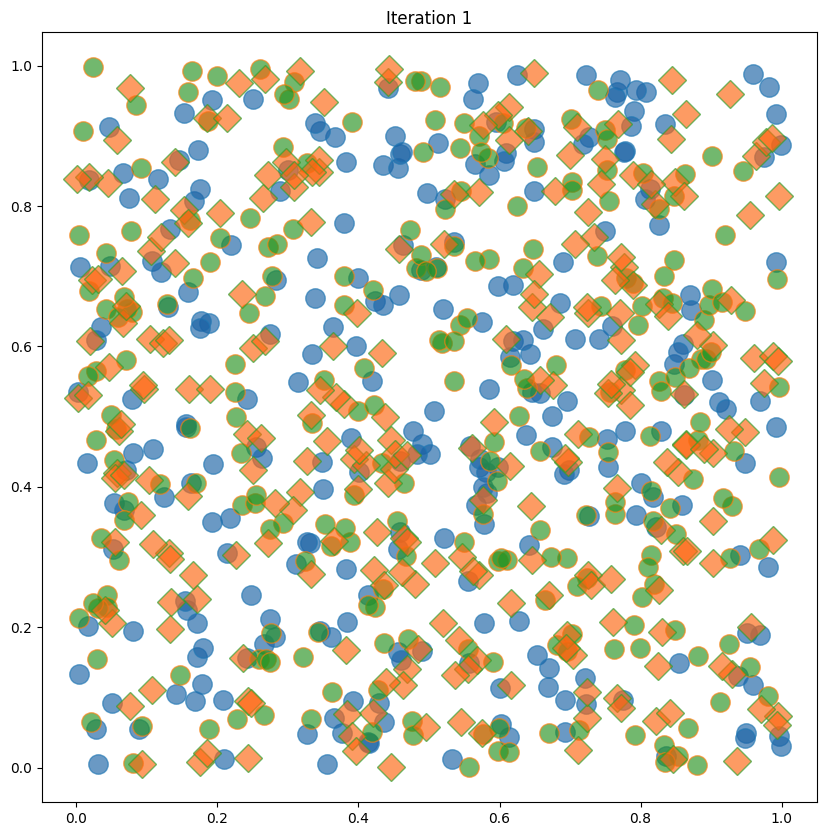

NameError: name 'NumNeighbors' is not defined

In [4]:
num = 250   # These many agents of a particular type
numNeighbors = 12 # Number of agents regarded as neighbors
requireSameType = 8 # At least this many neighbors to be same type
seed(10) #for reproducible random numbers

class StudentAgent:
    def __init__(self, type):
        #students of different type will be shown in colors
        self.type = type
        self.show_position()
    def show_position(self):
        # position changed by using uniform(x,y)
        self.position = uniform(0, 1), uniform(0, 1)
    
    def get_distance(self, other):
        #returns euclidean distance between self and other agent.
        a = (self.position[0] - other.position[0])**2
        b = (self.position[1] - other.position[1])**2
        return sqrt(a+b)
    
    def happy(self, agents):
        "returns True if reqd number of neighbors are the same type."
        distances = []
        
        for agent in agents:
            if self != agent:
                distance = self.get_distance(agent)
                distances.append((distance, agent))
        distances.sort()
        neighbors = [agent for d, agent in distances[:NumNeighbors]]
        nunSameType = sum(self.type == agent.type for agent in neighbors)
        return numSameType >= requireSameType
    def update(self, agents):
        "If not happy, randomly choose new positions until happy."
        while not self.happy(agents):
            self.show_position()
            
def plot_distribution(agents, cycle_num):
    x1, y1 = [],[]
    x2,y2 = [],[]
    x3,y3 = [],[]
    for agent in agents:
        x, y = agent.position
        if agent.type == 0:
            x1.append(x)
            y1.append(y)
        elif agent.type == 1:
            x2.append(x)
            y2.append(y)
        else:
            x3.append(x)
            y3.append(y)
    fig, ax = plt.subplots(figsize=(10,10))
    plot_args = {'markersize':8, 'alpha':0.65, 'markersize':14}
   
    ax.plot(x1, y1, 'o', markerfacecolor='#1b62a5', **plot_args)
    ax.plot(x2, y2, 'o', markerfacecolor='#279321', **plot_args)
    ax.plot(x3, y3, 'D', markerfacecolor='#fd6610', **plot_args)
    ax.set_title('Iteration {}'.format(cycle_num))
    plt.show()

agents = [StudentAgent(0) for i in range(num)]
agents.extend(StudentAgent(1) for i in range(num))
agents.extend(StudentAgent(2) for i in range(num))
count = 1
terminate = False
while terminate == False:
    plot_distribution(agents, count)
    count += 1
    no_one_moved = True
    
    for agent in agents:
        old_position = agent.position
        agent.update(agents)
        if agent.position != old_position:
            no_one_moved = False
    if no_one_moved:
        terminate = True
        
    
    
        
        